# **Phase 2: PCA Analysis**

**Uploading the cleaned dataset after the preprocessing phase**

In [1]:
from google.colab import files
files.upload()

Saving heart_disease_preprocessed.csv to heart_disease_preprocessed.csv


{'heart_disease_preprocessed.csv': b'age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target\n0.9487264714397227,0.8214462122919168,-0.265039805171932,0.015306106301897814,0.7637855781918064,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0\n1.3920019083652986,1.7239052490013103,0.8512135993012008,-1.8353875639875028,-0.023716013274352084,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1\n1.3920019083652986,-0.6826521822237388,-0.3492853451321684,-0.9100407288428025,1.059098674991616,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1\n-1.9325638685765207,-0.08101282441747655,0.09300373965907287,1.645679101556846,1.9450379653910443,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/heart_disease_preprocessed.csv')

In [6]:
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target
0,0.948726,0.821446,-0.265040,0.015306,0.763786,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,1.723905,0.851214,-1.835388,-0.023716,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.392002,-0.682652,-0.349285,-0.910041,1.059099,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,-0.081013,0.093004,1.645679,1.945038,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-0.081013,-0.875820,0.984717,-0.122154,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


**Split Features and Target:** We do this so that PCA works only on the independent variables X and we keep the Target y to use later for classification or visualization

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df.drop("target", axis=1)
y = df["target"]

**Apply PCA to the data:** Here we let PCA compute all components and measure the variance each one explains The goal is to understand the patterns and find the smallest number of components that are sufficient

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X)

**Get explained variance ratio:** We calculate this to know how much information variance each principal component keeps

In [14]:
explain_var = pca.explained_variance_ratio_
cum_var = explain_var.cumsum()
print("Explained Variance Ratio:", explain_var)
print("Cumulative Explained Variance:", cum_var)

Explained Variance Ratio: [2.19080489e-01 1.34892396e-01 1.15063985e-01 9.48110480e-02
 7.33285604e-02 5.81972992e-02 5.15976816e-02 3.85314653e-02
 3.70216115e-02 3.04746252e-02 2.76873908e-02 2.56867365e-02
 2.44702668e-02 1.88357487e-02 1.36641199e-02 1.00141536e-02
 9.21360030e-03 7.82901753e-03 7.57900444e-03 2.02080025e-03
 8.95615616e-18 6.22586355e-18 6.22263678e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Cumulative Explained Variance: [0.21908049 0.35397289 0.46903687 0.56384792 0.63717648 0.69537378
 0.74697146 0.78550292 0.82252454 0.85299916 0.88068655 0.90637329
 0.93084356 0.9496793  0.96334342 0.97335758 0.98257118 0.9904002
 0.9979792  1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


**Visualization - Scatter plot:** We plot the first two components PC1 and PC2 to visualize the data after dimensionality reduction We color by the target to see if there is a clear separation between the classes

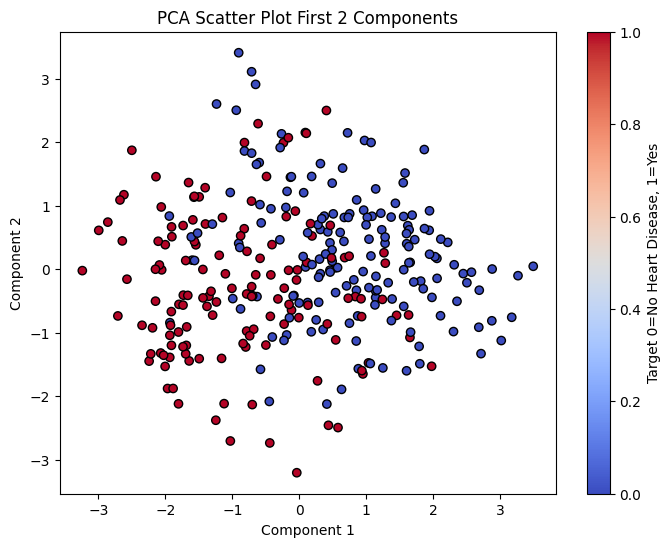

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA Scatter Plot First 2 Components")
plt.colorbar(label="Target 0=No Heart Disease, 1=Yes")
plt.show()

**Cumulative variance plot:** We plot this to decide how many components are enough to keep most of the information. For example, we may choose the number of PCs that explain 95% variance.

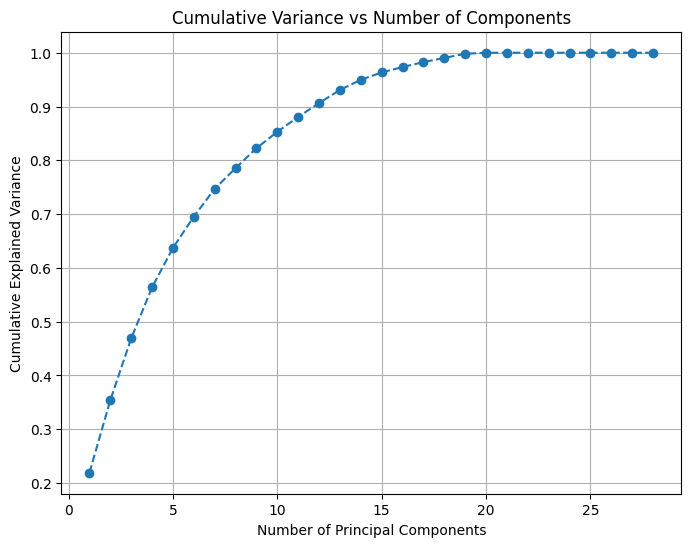

In [10]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance vs Number of Components")
plt.grid(True)
plt.show()

**Reapply PCA with the optimal number of components:** We set n_components=0.95: this means PCA will keep enough components to explain 95% of the variance This reduces the dimensionality of the data while preserving most of the information

In [12]:
pca_opt = PCA(n_components=0.95)
X_pca_opt = pca_opt.fit_transform(X)

print("Original shape:", X.shape)
print("PCA reduced shape 95% variance:", X_pca_opt.shape)

Original shape: (303, 28)
PCA reduced shape 95% variance: (303, 15)


In [16]:
display(X_pca_opt[:5])

array([[-0.90425535,  0.4080805 ,  1.02582812, -0.90714767,  0.19695417,
         0.51814364,  0.7267645 , -0.61178536, -0.35890322, -0.12128731,
         1.04749603,  0.6009939 , -0.58434849,  0.33223043, -0.53681432],
       [-2.99560697,  0.61271056, -0.36640518, -0.37090666, -0.48577789,
        -0.66607013,  0.36358586,  0.34902249, -0.61688911, -0.22215086,
         0.16901655, -0.8457435 , -0.41606191, -0.40551025,  0.2664182 ],
       [-2.0700483 , -1.31913779, -0.11732217,  0.36873273,  0.43169164,
         0.95147058,  0.58299212,  0.25404997,  0.64640645, -0.23769447,
         0.25669946,  0.02860508,  0.13245479,  0.01628127,  0.76258197],
       [ 1.81638422, -0.18636751,  2.56424848,  1.20536105,  0.39331422,
        -0.22142467, -0.33268039, -0.82315331, -0.11910771,  0.24106592,
         0.17683061, -0.36012315, -0.07008951, -0.45185162, -0.19554255],
       [ 2.05841752,  0.17169316,  0.68600783, -0.20924991,  0.05702756,
        -0.79101836,  0.94967036,  0.5443388 , 

**Convert PCA-reduced data to DataFrame:** Convert the `X_pca_opt` NumPy array into a pandas DataFrame.

In [17]:
X_pca_df = pd.DataFrame(X_pca_opt)
display(X_pca_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.904255,0.408081,1.025828,-0.907148,0.196954,0.518144,0.726764,-0.611785,-0.358903,-0.121287,1.047496,0.600994,-0.584348,0.332230,-0.536814
1,-2.995607,0.612711,-0.366405,-0.370907,-0.485778,-0.666070,0.363586,0.349022,-0.616889,-0.222151,0.169017,-0.845743,-0.416062,-0.405510,0.266418
2,-2.070048,-1.319138,-0.117322,0.368733,0.431692,0.951471,0.582992,0.254050,0.646406,-0.237694,0.256699,0.028605,0.132455,0.016281,0.762582
3,1.816384,-0.186368,2.564248,1.205361,0.393314,-0.221425,-0.332680,-0.823153,-0.119108,0.241066,0.176831,-0.360123,-0.070090,-0.451852,-0.195543
4,2.058418,0.171693,0.686008,-0.209250,0.057028,-0.791018,0.949670,0.544339,0.003604,-0.169836,-0.463730,0.335354,0.055343,0.856381,0.120255


**add the target column back to the dataset**

In [18]:
X_pca_df['target'] = y.values
display(X_pca_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,-0.904255,0.408081,1.025828,-0.907148,0.196954,0.518144,0.726764,-0.611785,-0.358903,-0.121287,1.047496,0.600994,-0.584348,0.332230,-0.536814,0
1,-2.995607,0.612711,-0.366405,-0.370907,-0.485778,-0.666070,0.363586,0.349022,-0.616889,-0.222151,0.169017,-0.845743,-0.416062,-0.405510,0.266418,1
2,-2.070048,-1.319138,-0.117322,0.368733,0.431692,0.951471,0.582992,0.254050,0.646406,-0.237694,0.256699,0.028605,0.132455,0.016281,0.762582,1
3,1.816384,-0.186368,2.564248,1.205361,0.393314,-0.221425,-0.332680,-0.823153,-0.119108,0.241066,0.176831,-0.360123,-0.070090,-0.451852,-0.195543,0
4,2.058418,0.171693,0.686008,-0.209250,0.057028,-0.791018,0.949670,0.544339,0.003604,-0.169836,-0.463730,0.335354,0.055343,0.856381,0.120255,0


**Save the PCA-reduced DataFrame to CSV:** Save the DataFrame to a new CSV file.

In [19]:
X_pca_df.to_csv('heart_disease_pca.csv', index=False)
print("PCA-reduced data saved to heart_disease_pca.csv")

PCA-reduced data saved to heart_disease_pca.csv
